In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
area_link = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/면적(2019).csv'
ar = pd.read_csv(area_link, encoding='utf-8')
ar.head()

,Unnamed: 0,시도,시도코드,면적(2019)
0,3,서울,11,6.052370e+08
1,4,부산,21,7.700734e+08
2,5,대구,22,8.835173e+08
3,6,인천,23,1.063258e+09
4,7,광주,24,5.011363e+08


In [4]:
people_link = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구대비데이터정리.csv'
pp = pd.read_csv(people_link)
pp.head()

,Unnamed: 0,시도코드,시도명,십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수
0,0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859
1,1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495
2,2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563
3,3,23,인천광역시,65.645136,2952237,2957026,24081,5071,11639,8.143655,1.714899,3.936049,34176,11.6,1677,3,16,62,1573,0.567124,0.006425
4,4,24,광주광역시,60.682137,1489730,1456468,17835,3658,8949,12.245377,2.511555,6.144316,40206,27.6,1075,2,21,80,948,0.738087,0.015792


In [5]:
employee_link = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/employees.csv'
em = pd.read_csv(employee_link)
em.head()

,시도,요양기관종별,의사계,간호사계
0,서울,소계,30359,52727
1,서울,상급종합병원,9910,22931
2,서울,종합병원,5191,14164
3,서울,병원,2074,6031
4,서울,의원,12413,4722


In [6]:
em1 = em[em.요양기관종별 == '상급종합병원']
em1.rename(columns = {'의사계' : '상급종합병원의사', '간호사계' : '상급종합병원간호사'}, inplace = True)
em1.drop(columns=['요양기관종별'], axis=1, inplace=True)
em1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시도,상급종합병원의사,상급종합병원간호사
1,서울,9910,22931
6,부산,1554,4570
11,인천,1256,4065
16,대구,1831,4614
21,광주,780,1884


In [7]:
em2 = em[em.요양기관종별 == '종합병원']
em2.columns = ['시도', '종별', '종합병원의사', '종합병원간호사']
em2.drop(['종별'], axis=1, inplace=True)
em2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시도,종합병원의사,종합병원간호사
2,서울,5191,14164
7,부산,1621,6422
12,인천,825,3638
17,대구,544,2115
22,광주,676,2986


In [8]:
em3 = em[em.요양기관종별 == '병원']
em3.columns = ['시도', '종별', '병원의사', '병원간호사']
em3.drop(['종별'], axis=1, inplace=True)
em3.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시도,병원의사,병원간호사
3,서울,2074,6031
8,부산,1020,3389
13,인천,505,1727
18,대구,800,3477
23,광주,597,1816


In [9]:
em4 = em[em.요양기관종별 == '의원']
em4.columns = ['시도', '종별', '의원의사', '의원간호사']
em4.drop(['종별'], axis=1, inplace=True)
em4.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시도,의원의사,의원간호사
4,서울,12413,4722
9,부산,3015,617
14,인천,2128,537
19,대구,2437,884
24,광주,1218,527


In [10]:
df = pd.merge(ar, pp, on='시도코드')
df = df.drop(['Unnamed: 0_x', '시도코드', 'Unnamed: 0_y', '시도명'], axis=1)
df.head()

,시도,면적(2019),십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수
0,서울,6.052370e+08,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859
1,부산,7.700734e+08,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495
2,대구,8.835173e+08,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563
3,인천,1.063258e+09,65.645136,2952237,2957026,24081,5071,11639,8.143655,1.714899,3.936049,34176,11.6,1677,3,16,62,1573,0.567124,0.006425
4,광주,5.011363e+08,60.682137,1489730,1456468,17835,3658,8949,12.245377,2.511555,6.144316,40206,27.6,1075,2,21,80,948,0.738087,0.015792


In [11]:
k = pd.merge(em1, em2, on='시도', how='outer')
l = pd.merge(k, em3, on='시도', how='outer')
m = pd.merge(l, em4, on='시도', how='outer')
s = pd.merge(df, m, on='시도', how='outer')
s

,시도,면적(2019),십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수,상급종합병원의사,상급종합병원간호사,종합병원의사,종합병원간호사,병원의사,병원간호사,의원의사,의원간호사
0,서울,6.052370e+08,66.496942,9639541.0,9729107.0,114861.0,30359.0,52727.0,11.805914,3.120430,5.419511,88059.0,9.1,8924.0,13.0,44.0,228.0,8628.0,0.917248,0.005859,9910.0,22931.0,5191.0,14164.0,2074.0,6031.0,12413.0,4722.0
1,부산,7.700734e+08,86.370176,3372692.0,3413841.0,37028.0,8008.0,18514.0,10.846434,2.345745,5.423217,69862.0,20.5,2576.0,4.0,25.0,142.0,2384.0,0.754575,0.008495,1554.0,4570.0,1621.0,6422.0,1020.0,3389.0,3015.0,617.0
2,대구,8.835173e+08,61.359540,2429940.0,2438031.0,26087.0,5908.0,12557.0,10.700028,2.423267,5.150468,38132.0,15.6,1950.0,5.0,11.0,109.0,1803.0,0.799826,0.006563,1831.0,4614.0,544.0,2115.0,800.0,3477.0,2437.0,884.0
3,인천,1.063258e+09,65.645136,2952237.0,2957026.0,24081.0,5071.0,11639.0,8.143655,1.714899,3.936049,34176.0,11.6,1677.0,3.0,16.0,62.0,1573.0,0.567124,0.006425,1256.0,4065.0,825.0,3638.0,505.0,1727.0,2128.0,537.0
4,광주,5.011363e+08,60.682137,1489730.0,1456468.0,17835.0,3658.0,8949.0,12.245377,2.511555,6.144316,40206.0,27.6,1075.0,2.0,21.0,80.0,948.0,0.738087,0.015792,780.0,1884.0,676.0,2986.0,597.0,1816.0,1218.0,527.0
5,대전,5.396265e+08,55.576349,1498839.0,1474870.0,15746.0,3726.0,7153.0,10.676195,2.526324,4.849919,23417.0,15.9,1164.0,1.0,9.0,51.0,1078.0,0.789222,0.006780,534.0,1299.0,1053.0,3110.0,383.0,1172.0,1519.0,382.0
6,울산,1.062039e+09,52.723985,1143692.0,1148019.0,8950.0,1754.0,4612.0,7.796038,1.527849,4.017355,15284.0,13.3,686.0,0.0,8.0,43.0,609.0,0.597551,0.006969,NaN,NaN,590.0,2738.0,286.0,842.0,738.0,297.0
7,경기,1.019251e+10,37.854591,338136.0,340575.0,1109.0,302.0,220.0,3.256258,0.886736,0.645966,1440.0,4.2,211.0,0.0,1.0,0.0,181.0,0.619540,0.002936,2460.0,6274.0,5237.0,16102.0,2233.0,6403.0,9683.0,3219.0
8,세종특별자치시,4.649497e+08,59.492215,13300900.0,13239666.0,91723.0,21210.0,39694.0,6.927894,1.602004,2.998112,133118.0,10.1,7437.0,5.0,59.0,277.0,7065.0,0.561721,0.004834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,강원,1.682828e+10,120.779382,1520127.0,1541502.0,12115.0,2719.0,6043.0,7.859218,1.763864,3.920203,17372.0,11.3,861.0,1.0,14.0,45.0,769.0,0.558546,0.009731,404.0,938.0,841.0,2783.0,301.0,913.0,941.0,573.0


In [12]:
df1 =  df[['시도', '십만명당 회피가능사망율', '면적(2019)', '천명당 상급+종합병원수']]
df1['면적당병원수_상'] = (df['상급종합병원']) / df1['면적(2019)']
df1['면적당병원수_종'] = (df['종합병원']) / df1['면적(2019)']
df1['면적당병원수_병'] = (df['병원']) / df1['면적(2019)']
df1['면적당병원수all'] = (df['상급종합병원']+df['종합병원']+df['병원']) / df1['면적(2019)']
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,시도,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수_상,면적당병원수_종,면적당병원수_병,면적당병원수all
0,서울,66.496942,6.052370e+08,0.005859,2.147919e-08,7.269879e-08,3.767119e-07,4.708899e-07
1,부산,86.370176,7.700734e+08,0.008495,5.194310e-09,3.246444e-08,1.843980e-07,2.220568e-07
2,대구,61.359540,8.835173e+08,0.006563,5.659199e-09,1.245024e-08,1.233705e-07,1.414800e-07
3,인천,65.645136,1.063258e+09,0.006425,2.821517e-09,1.504809e-08,5.831135e-08,7.618096e-08
4,광주,60.682137,5.011363e+08,0.015792,3.990931e-09,4.190477e-08,1.596372e-07,2.055329e-07
5,대전,55.576349,5.396265e+08,0.006780,1.853134e-09,1.667820e-08,9.450981e-08,1.130411e-07
6,울산,52.723985,1.062039e+09,0.006969,0.000000e+00,7.532681e-09,4.048816e-08,4.802084e-08
7,경기,37.854591,1.019251e+10,0.002936,0.000000e+00,9.811122e-11,0.000000e+00,9.811122e-11
8,세종특별자치시,59.492215,4.649497e+08,0.004834,1.075385e-08,1.268955e-07,5.957634e-07,7.334127e-07
9,강원,120.779382,1.682828e+10,0.009731,5.942378e-11,8.319329e-10,2.674070e-09,3.565427e-09


In [13]:
df2 = s[['시도', '십만명당 회피가능사망율', '면적(2019)']]#, '상급종합병원의사',	'상급종합병원간호사', '종합병원의사', '종합병원간호사']]
df2['상급병원인력'] = (s['상급종합병원의사']+s['상급종합병원간호사'])
df2['종합병원인력'] = (s['종합병원의사']+s['종합병원간호사'])
df2['병원인력'] = (s['병원의사']+s['병원간호사'])
df2['의원인력'] = (s['의원의사']+s['의원간호사'])
df2['상급밀도'] = (s['상급종합병원의사']+s['상급종합병원간호사']) / df2['면적(2019)']
df2['종합밀도'] = (s['종합병원의사']+s['종합병원간호사']) / df2['면적(2019)']
df2['병원밀도'] = (s['병원의사']+s['병원간호사']) / df2['면적(2019)']
df2['의원밀도'] = (s['의원의사']+s['의원간호사']) / df2['면적(2019)']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,시도,십만명당 회피가능사망율,면적(2019),상급병원인력,종합병원인력,병원인력,의원인력,상급밀도,종합밀도,병원밀도,의원밀도
0,서울,66.496942,6.052370e+08,32841.0,19355.0,8105.0,17135.0,5.426139e-05,3.197921e-05,1.339145e-05,2.831122e-05
1,부산,86.370176,7.700734e+08,6124.0,8043.0,4409.0,3632.0,7.952489e-06,1.044446e-05,5.725428e-06,4.716433e-06
2,대구,61.359540,8.835173e+08,6445.0,2659.0,4277.0,3321.0,7.294707e-06,3.009562e-06,4.840879e-06,3.758840e-06
3,인천,65.645136,1.063258e+09,5321.0,4463.0,2232.0,2665.0,5.004430e-06,4.197477e-06,2.099209e-06,2.506448e-06
4,광주,60.682137,5.011363e+08,2664.0,3662.0,2413.0,1745.0,5.315919e-06,7.307394e-06,4.815058e-06,3.482087e-06
5,대전,55.576349,5.396265e+08,1833.0,4163.0,1555.0,1901.0,3.396794e-06,7.714595e-06,2.881623e-06,3.522807e-06
6,울산,52.723985,1.062039e+09,NaN,3328.0,1128.0,1035.0,NaN,3.133595e-06,1.062108e-06,9.745407e-07
7,경기,37.854591,1.019251e+10,8734.0,21339.0,8636.0,12902.0,8.569034e-07,2.093595e-06,8.472885e-07,1.265831e-06
8,세종특별자치시,59.492215,4.649497e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,강원,120.779382,1.682828e+10,1342.0,3624.0,1214.0,1514.0,7.974671e-08,2.153518e-07,7.214047e-08,8.996760e-08


In [14]:
import matplotlib.pyplot as plt

In [15]:
save1 = df1.corr(method='pearson')
save1.to_csv('병원수와사망률.csv')
save1

,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수_상,면적당병원수_종,면적당병원수_병,면적당병원수all
십만명당 회피가능사망율,1.000000,0.595427,0.466354,-0.317065,-0.355018,-0.368632,-0.367221
면적(2019),0.595427,1.000000,0.061136,-0.485169,-0.505059,-0.525548,-0.524281
천명당 상급+종합병원수,0.466354,0.061136,1.000000,-0.192269,-0.129758,-0.186548,-0.178312
면적당병원수_상,-0.317065,-0.485169,-0.192269,1.000000,0.781387,0.823204,0.826293
면적당병원수_종,-0.355018,-0.505059,-0.129758,0.781387,1.000000,0.990512,0.992513
면적당병원수_병,-0.368632,-0.525548,-0.186548,0.823204,0.990512,1.000000,0.999766
면적당병원수all,-0.367221,-0.524281,-0.178312,0.826293,0.992513,0.999766,1.000000


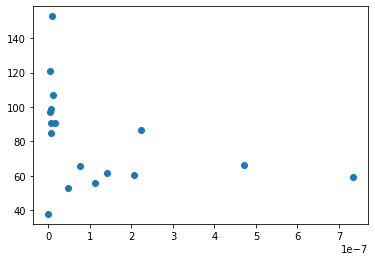

In [16]:
plt.scatter(df1['면적당병원수all'], df1['십만명당 회피가능사망율'])
plt.show()

In [17]:
save2 = df2.dropna().corr(method='pearson')
save2.to_csv('의사수와사망률.csv')
save2

,십만명당 회피가능사망율,면적(2019),상급병원인력,종합병원인력,병원인력,의원인력,상급밀도,종합밀도,병원밀도,의원밀도
십만명당 회피가능사망율,1.000000,0.634805,-0.334821,-0.461565,-0.455878,-0.451334,-0.251126,-0.331405,-0.388183,-0.283725
면적(2019),0.634805,1.000000,-0.369775,-0.080224,-0.186423,-0.176488,-0.445222,-0.561839,-0.670484,-0.468718
상급병원인력,-0.334821,-0.369775,1.000000,0.744753,0.738797,0.894761,0.968769,0.916837,0.871195,0.965144
종합병원인력,-0.461565,-0.080224,0.744753,1.000000,0.931500,0.952652,0.590560,0.595144,0.512257,0.605662
병원인력,-0.455878,-0.186423,0.738797,0.931500,1.000000,0.908065,0.592606,0.579360,0.587977,0.601228
의원인력,-0.451334,-0.176488,0.894761,0.952652,0.908065,1.000000,0.771692,0.731431,0.662648,0.778044
상급밀도,-0.251126,-0.445222,0.968769,0.590560,0.592606,0.771692,1.000000,0.965039,0.926421,0.997673
종합밀도,-0.331405,-0.561839,0.916837,0.595144,0.579360,0.731431,0.965039,1.000000,0.957981,0.977250
병원밀도,-0.388183,-0.670484,0.871195,0.512257,0.587977,0.662648,0.926421,0.957981,1.000000,0.935208
의원밀도,-0.283725,-0.468718,0.965144,0.605662,0.601228,0.778044,0.997673,0.977250,0.935208,1.000000


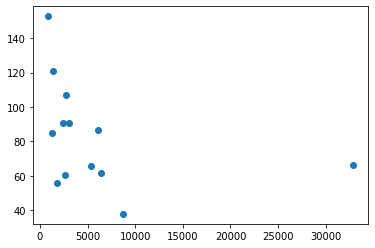

In [18]:
plt.scatter(df2['상급병원인력'], df2['십만명당 회피가능사망율'])
plt.show()

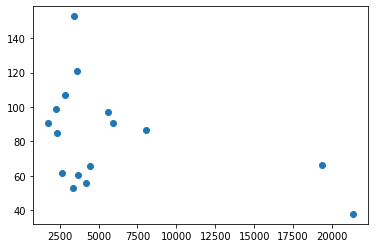

In [19]:
plt.scatter(df2['종합병원인력'], df2['십만명당 회피가능사망율'])
plt.show()

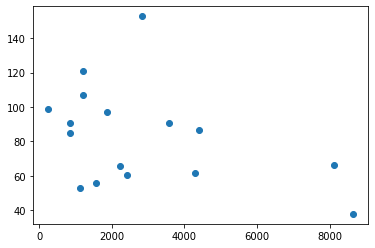

In [20]:
plt.scatter(df2['병원인력'], df2['십만명당 회피가능사망율'])
plt.show()

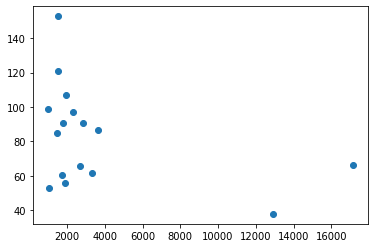

In [21]:
plt.scatter(df2['의원인력'], df2['십만명당 회피가능사망율'])
plt.show()

In [22]:
df3 = df1
df3.drop([0, 7], inplace=True)
df3

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시도,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수_상,면적당병원수_종,면적당병원수_병,면적당병원수all
1,부산,86.370176,7.700734e+08,0.008495,5.194310e-09,3.246444e-08,1.843980e-07,2.220568e-07
2,대구,61.359540,8.835173e+08,0.006563,5.659199e-09,1.245024e-08,1.233705e-07,1.414800e-07
3,인천,65.645136,1.063258e+09,0.006425,2.821517e-09,1.504809e-08,5.831135e-08,7.618096e-08
4,광주,60.682137,5.011363e+08,0.015792,3.990931e-09,4.190477e-08,1.596372e-07,2.055329e-07
5,대전,55.576349,5.396265e+08,0.006780,1.853134e-09,1.667820e-08,9.450981e-08,1.130411e-07
6,울산,52.723985,1.062039e+09,0.006969,0.000000e+00,7.532681e-09,4.048816e-08,4.802084e-08
8,세종특별자치시,59.492215,4.649497e+08,0.004834,1.075385e-08,1.268955e-07,5.957634e-07,7.334127e-07
9,강원,120.779382,1.682828e+10,0.009731,5.942378e-11,8.319329e-10,2.674070e-09,3.565427e-09
10,충북,84.942213,7.406820e+09,0.008125,1.350107e-10,1.620128e-09,4.995396e-09,6.750535e-09
11,충남,90.466767,8.245541e+09,0.006121,2.425553e-10,1.334054e-09,5.336218e-09,6.912827e-09


In [23]:
df4 = df2.dropna()
df4.drop([0, 7], inplace=True)
df4

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시도,십만명당 회피가능사망율,면적(2019),상급병원인력,종합병원인력,병원인력,의원인력,상급밀도,종합밀도,병원밀도,의원밀도
1,부산,86.370176,7.700734e+08,6124.0,8043.0,4409.0,3632.0,7.952489e-06,1.044446e-05,5.725428e-06,4.716433e-06
2,대구,61.359540,8.835173e+08,6445.0,2659.0,4277.0,3321.0,7.294707e-06,3.009562e-06,4.840879e-06,3.758840e-06
3,인천,65.645136,1.063258e+09,5321.0,4463.0,2232.0,2665.0,5.004430e-06,4.197477e-06,2.099209e-06,2.506448e-06
4,광주,60.682137,5.011363e+08,2664.0,3662.0,2413.0,1745.0,5.315919e-06,7.307394e-06,4.815058e-06,3.482087e-06
5,대전,55.576349,5.396265e+08,1833.0,4163.0,1555.0,1901.0,3.396794e-06,7.714595e-06,2.881623e-06,3.522807e-06
9,강원,120.779382,1.682828e+10,1342.0,3624.0,1214.0,1514.0,7.974671e-08,2.153518e-07,7.214047e-08,8.996760e-08
10,충북,84.942213,7.406820e+09,1259.0,2313.0,837.0,1448.0,1.699785e-07,3.122798e-07,1.130040e-07,1.954955e-07
11,충남,90.466767,8.245541e+09,2432.0,1779.0,840.0,1816.0,2.949473e-07,2.157530e-07,1.018732e-07,2.202403e-07
12,전북,107.113830,8.069139e+09,2734.0,2824.0,1209.0,1954.0,3.388218e-07,3.499754e-07,1.498301e-07,2.421572e-07
13,전남,152.779542,1.234521e+10,888.0,3438.0,2839.0,1508.0,7.193074e-08,2.784886e-07,2.299677e-07,1.221526e-07


In [24]:
save3 = df3.corr(method='pearson')
save3.to_csv('병원밀도와사망률(서울경기제외).csv')
save3

,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수_상,면적당병원수_종,면적당병원수_병,면적당병원수all
십만명당 회피가능사망율,1.000000,0.725633,0.332733,-0.501694,-0.427940,-0.448967,-0.447363
면적(2019),0.725633,1.000000,0.113736,-0.563736,-0.453782,-0.476746,-0.475447
천명당 상급+종합병원수,0.332733,0.113736,1.000000,-0.189651,-0.146594,-0.215721,-0.203897
면적당병원수_상,-0.501694,-0.563736,-0.189651,1.000000,0.902483,0.940228,0.937117
면적당병원수_종,-0.427940,-0.453782,-0.146594,0.902483,1.000000,0.989362,0.992310
면적당병원수_병,-0.448967,-0.476746,-0.215721,0.940228,0.989362,1.000000,0.999747
면적당병원수all,-0.447363,-0.475447,-0.203897,0.937117,0.992310,0.999747,1.000000


In [25]:
save4 = df4.corr(method='pearson')
save4.to_csv('의사수와사망률(서울경기제외).csv')
save4

,십만명당 회피가능사망율,면적(2019),상급병원인력,종합병원인력,병원인력,의원인력,상급밀도,종합밀도,병원밀도,의원밀도
십만명당 회피가능사망율,1.000000,0.831932,-0.507085,-0.081416,-0.130329,-0.393681,-0.630584,-0.575110,-0.611396,-0.683195
면적(2019),0.831932,1.000000,-0.644499,-0.237096,-0.363013,-0.513846,-0.837242,-0.785823,-0.815171,-0.874514
상급병원인력,-0.507085,-0.644499,1.000000,0.440192,0.704897,0.925010,0.839262,0.489317,0.707147,0.696464
종합병원인력,-0.081416,-0.237096,0.440192,1.000000,0.647914,0.649466,0.457883,0.626462,0.461283,0.480476
병원인력,-0.130329,-0.363013,0.704897,0.647914,1.000000,0.832876,0.671148,0.441790,0.660205,0.581774
의원인력,-0.393681,-0.513846,0.925010,0.649466,0.832876,1.000000,0.733518,0.476321,0.637726,0.628074
상급밀도,-0.630584,-0.837242,0.839262,0.457883,0.671148,0.733518,1.000000,0.819313,0.964167,0.959151
종합밀도,-0.575110,-0.785823,0.489317,0.626462,0.441790,0.476321,0.819313,1.000000,0.872754,0.922721
병원밀도,-0.611396,-0.815171,0.707147,0.461283,0.660205,0.637726,0.964167,0.872754,1.000000,0.970167
의원밀도,-0.683195,-0.874514,0.696464,0.480476,0.581774,0.628074,0.959151,0.922721,0.970167,1.000000


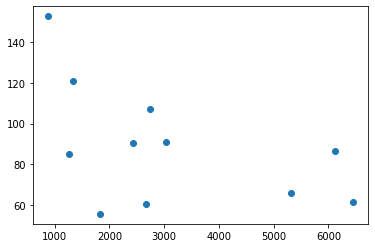

In [26]:
plt.scatter(df4['상급병원인력'], df4['십만명당 회피가능사망율'])
plt.show()

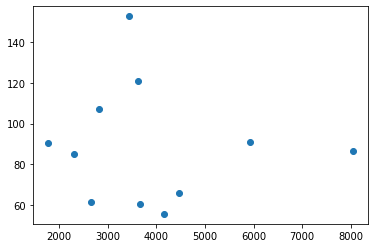

In [27]:
plt.scatter(df4['종합병원인력'], df4['십만명당 회피가능사망율'])
plt.show()

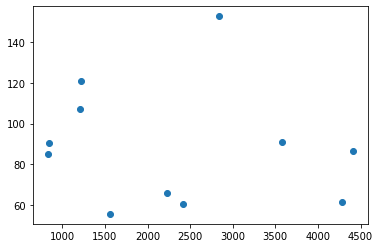

In [28]:
plt.scatter(df4['병원인력'], df4['십만명당 회피가능사망율'])
plt.show()

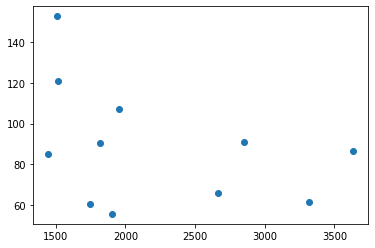

In [29]:
plt.scatter(df4['의원인력'], df4['십만명당 회피가능사망율'])
plt.show()

In [30]:
save1

,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수_상,면적당병원수_종,면적당병원수_병,면적당병원수all
십만명당 회피가능사망율,1.000000,0.595427,0.466354,-0.317065,-0.355018,-0.368632,-0.367221
면적(2019),0.595427,1.000000,0.061136,-0.485169,-0.505059,-0.525548,-0.524281
천명당 상급+종합병원수,0.466354,0.061136,1.000000,-0.192269,-0.129758,-0.186548,-0.178312
면적당병원수_상,-0.317065,-0.485169,-0.192269,1.000000,0.781387,0.823204,0.826293
면적당병원수_종,-0.355018,-0.505059,-0.129758,0.781387,1.000000,0.990512,0.992513
면적당병원수_병,-0.368632,-0.525548,-0.186548,0.823204,0.990512,1.000000,0.999766
면적당병원수all,-0.367221,-0.524281,-0.178312,0.826293,0.992513,0.999766,1.000000


In [31]:
save2

,십만명당 회피가능사망율,면적(2019),상급병원인력,종합병원인력,병원인력,의원인력,상급밀도,종합밀도,병원밀도,의원밀도
십만명당 회피가능사망율,1.000000,0.634805,-0.334821,-0.461565,-0.455878,-0.451334,-0.251126,-0.331405,-0.388183,-0.283725
면적(2019),0.634805,1.000000,-0.369775,-0.080224,-0.186423,-0.176488,-0.445222,-0.561839,-0.670484,-0.468718
상급병원인력,-0.334821,-0.369775,1.000000,0.744753,0.738797,0.894761,0.968769,0.916837,0.871195,0.965144
종합병원인력,-0.461565,-0.080224,0.744753,1.000000,0.931500,0.952652,0.590560,0.595144,0.512257,0.605662
병원인력,-0.455878,-0.186423,0.738797,0.931500,1.000000,0.908065,0.592606,0.579360,0.587977,0.601228
의원인력,-0.451334,-0.176488,0.894761,0.952652,0.908065,1.000000,0.771692,0.731431,0.662648,0.778044
상급밀도,-0.251126,-0.445222,0.968769,0.590560,0.592606,0.771692,1.000000,0.965039,0.926421,0.997673
종합밀도,-0.331405,-0.561839,0.916837,0.595144,0.579360,0.731431,0.965039,1.000000,0.957981,0.977250
병원밀도,-0.388183,-0.670484,0.871195,0.512257,0.587977,0.662648,0.926421,0.957981,1.000000,0.935208
의원밀도,-0.283725,-0.468718,0.965144,0.605662,0.601228,0.778044,0.997673,0.977250,0.935208,1.000000


In [32]:
save3

,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수_상,면적당병원수_종,면적당병원수_병,면적당병원수all
십만명당 회피가능사망율,1.000000,0.725633,0.332733,-0.501694,-0.427940,-0.448967,-0.447363
면적(2019),0.725633,1.000000,0.113736,-0.563736,-0.453782,-0.476746,-0.475447
천명당 상급+종합병원수,0.332733,0.113736,1.000000,-0.189651,-0.146594,-0.215721,-0.203897
면적당병원수_상,-0.501694,-0.563736,-0.189651,1.000000,0.902483,0.940228,0.937117
면적당병원수_종,-0.427940,-0.453782,-0.146594,0.902483,1.000000,0.989362,0.992310
면적당병원수_병,-0.448967,-0.476746,-0.215721,0.940228,0.989362,1.000000,0.999747
면적당병원수all,-0.447363,-0.475447,-0.203897,0.937117,0.992310,0.999747,1.000000


In [33]:
save4

,십만명당 회피가능사망율,면적(2019),상급병원인력,종합병원인력,병원인력,의원인력,상급밀도,종합밀도,병원밀도,의원밀도
십만명당 회피가능사망율,1.000000,0.831932,-0.507085,-0.081416,-0.130329,-0.393681,-0.630584,-0.575110,-0.611396,-0.683195
면적(2019),0.831932,1.000000,-0.644499,-0.237096,-0.363013,-0.513846,-0.837242,-0.785823,-0.815171,-0.874514
상급병원인력,-0.507085,-0.644499,1.000000,0.440192,0.704897,0.925010,0.839262,0.489317,0.707147,0.696464
종합병원인력,-0.081416,-0.237096,0.440192,1.000000,0.647914,0.649466,0.457883,0.626462,0.461283,0.480476
병원인력,-0.130329,-0.363013,0.704897,0.647914,1.000000,0.832876,0.671148,0.441790,0.660205,0.581774
의원인력,-0.393681,-0.513846,0.925010,0.649466,0.832876,1.000000,0.733518,0.476321,0.637726,0.628074
상급밀도,-0.630584,-0.837242,0.839262,0.457883,0.671148,0.733518,1.000000,0.819313,0.964167,0.959151
종합밀도,-0.575110,-0.785823,0.489317,0.626462,0.441790,0.476321,0.819313,1.000000,0.872754,0.922721
병원밀도,-0.611396,-0.815171,0.707147,0.461283,0.660205,0.637726,0.964167,0.872754,1.000000,0.970167
의원밀도,-0.683195,-0.874514,0.696464,0.480476,0.581774,0.628074,0.959151,0.922721,0.970167,1.000000
